In [1]:
import tensorflow as tf
import numpy as np
import os
# 주의!! inception 폴더가 현재 디렉토리에 있어야 정상 작동한다. 
from inception.data import build_image_data
from inception import image_processing
from inception import inception_model as inception
from os import listdir
from os.path import isfile, join

# weight파일의 경로
checkpoint_dir = "D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3"
# 한번에 몇개의 이미지를 프로세싱할지
batch_size = 100

# 펫 이미지의 경로
my_image_path = "D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\images/"
# 펫 이미지 폴더를 스캔해서 list로 만든다. 
img_file_list = [f for f in listdir(my_image_path)  if (f.rfind('jpg') > -1)]
file_size = len(img_file_list)


In [2]:
def inference_on_multi_image():
  print("total image size {} ".format(file_size) )
  
  total_batch_size = file_size // batch_size + 1
  logit_list = []

  for n in range(total_batch_size):
      print("step :{} / {}".format(n + 1, total_batch_size))
      mini_batch = img_file_list[n * batch_size: (n + 1) * batch_size]
      mini_adarr = np.ndarray(shape=(0, 299,299,3))
        
      with tf.Graph().as_default():
        num_classes = 1001 # (logit size)

        coder = build_image_data.ImageCoder()
        for i, image in enumerate(mini_batch):
          image_buffer, _, _ =  build_image_data._process_image(my_image_path + image, coder)
          image = image_processing.image_preprocessing(image_buffer, 0, False) # image -> (299, 299, 3)
          image = tf.expand_dims(image, 0) # (299, 299,3) -> (1, 299, 299, 3)
          mini_adarr = tf.concat([mini_adarr, image], 0) 

        logits, _ = inception.inference(mini_adarr, num_classes, for_training=False, restore_logits=True)

        saver = tf.train.Saver()
        with tf.Session() as tf_session:
          ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
          if ckpt and ckpt.model_checkpoint_path:
            if os.path.isabs(ckpt.model_checkpoint_path):
              # Restores from checkpoint with absolute path.
              saver.restore(tf_session, ckpt.model_checkpoint_path)
            else:
              # Restores from checkpoint with relative path.
              saver.restore(tf_session, os.path.join(checkpoint_dir,
                                               ckpt.model_checkpoint_path))

          l = tf_session.run([logits])
          for row in l[0]:
            logit_list.append(row)
                
  return logit_list


logit_list = inference_on_multi_image()

total image size 7390 
step :1 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :2 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :3 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :4 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :5 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :6 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :7 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_D

step :55 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :56 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :57 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :58 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :59 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :60 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585
step :61 / 74
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\

In [4]:
pip install sklearn


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=7a3cc467a941ed28ff5a3e05684ba1823d150cf9ce338c74e3580133c7999935
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [27]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=10)

In [28]:
knn.fit(logit_list)

NearestNeighbors(n_neighbors=10)

In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(predictions):
    for i in predictions:
        print_image(my_image_path + img_file_list[i])

def print_image(path):
    plt.figure()
    im = mpimg.imread(path)
    plt.imshow(im)

In [16]:
print_image(my_image_path + img_file_list[33])

ValueError: Only know how to handle PNG; with Pillow installed, Matplotlib can handle more images

<Figure size 432x288 with 0 Axes>

In [19]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [20]:
import PIL.Image as pilimg
import matplotlib.pyplot as plt

def print_image(path):
    img = pilimg.open(path)
    pix = np.array(img)
    plt.imshow(pix)

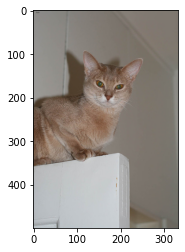

In [21]:
print_image(my_image_path + img_file_list[33])

In [44]:
def show_image(predictions):
    for i in predictions:
        print_image(my_image_path + img_file_list[i])

In [29]:
print(logit_list[33])

[0.18391377 0.13166067 0.216661   ... 0.17395097 0.3645399  1.1553044 ]


In [30]:
ay = logit_list[33].reshape(1, -1)

In [32]:
# 33번째 인덱스의 이미지와 근접해 있는 이웃을 찾는다. 
predict = knn.kneighbors(ay, return_distance=False)
print(predict)

[[  33 1168 1195 1121 1163 1174 1166   39 1170 1064]]


33
1168
1195
1121
1163
1174
1166
39
1170
1064


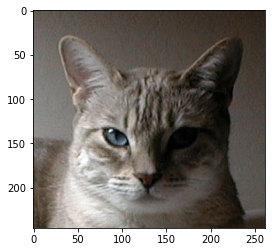

In [46]:
show_image(predict[0])

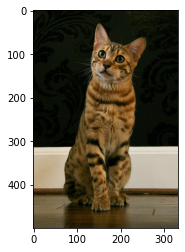

In [47]:
print_image(my_image_path + img_file_list[39])
print_image(my_image_path + img_file_list[1121])

In [25]:
# 33번째 인덱스의 이미지와 근접해 있는 이웃을 찾는다. 
predict = knn.kneighbors(logit_list[33], return_distance=False)
#print(predict)

ValueError: Expected 2D array, got 1D array instead:
array=[0.18391377 0.13166067 0.216661   ... 0.17395097 0.3645399  1.1553044 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

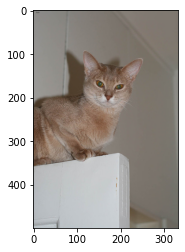

In [54]:
import matplotlib.image as mpimg
# plt.imshow(mpimg.imread('MyImage.png'))

plt.figure()
img = mpimg.imread(my_image_path + img_file_list[33])
plt.imshow(img)
plt.show()


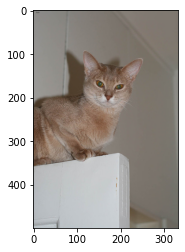

In [55]:
def print_image_(path):
    plt.figure()
    im = mpimg.imread(path)
    plt.imshow(im)
    plt.show()

print_image_(my_image_path + img_file_list[33])

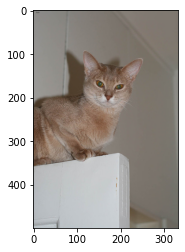

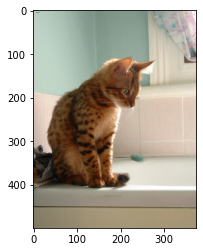

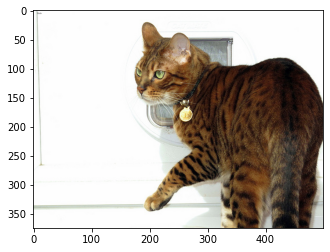

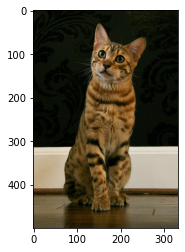

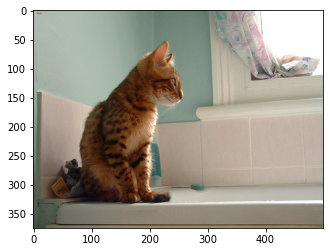

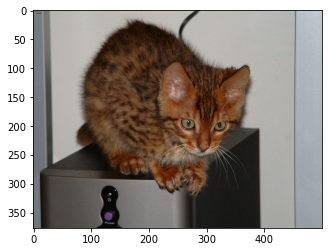

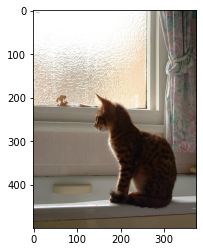

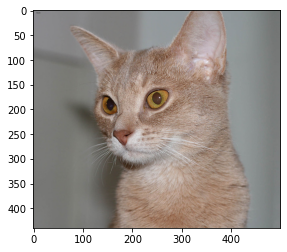

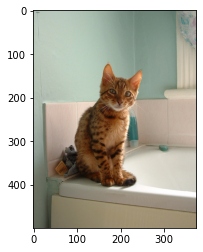

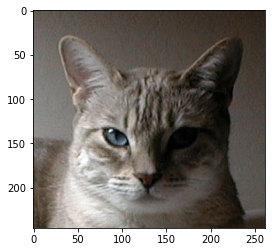

In [57]:
def show_image_(predictions):
    for i in predictions:
        print_image_(my_image_path + img_file_list[i])

show_image_(predict[0])

In [58]:
predict2 = knn.kneighbors('image_2cat.png', return_distance=False)
print(predict2)

ValueError: Expected 2D array, got scalar array instead:
array=image_2cat.png.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [59]:
print(logit_list[999])

[-0.16880244 -0.04188488  0.23626688 ...  0.31435806 -0.27885136
  1.1578519 ]


In [60]:
def inference_on_image(img_path):
  with tf.Graph().as_default():
    num_classes = 1001

    coder = build_image_data.ImageCoder()

    image_buffer, _, _ =  build_image_data._process_image(img_path, coder)

    image = image_processing.image_preprocessing(image_buffer, 0, False) # image -> (299, 299, 3)
    image = tf.expand_dims(image,0) # (299, 299,3) -> (1, 299, 299, 3)

    logits, _ = inception.inference(image, num_classes, for_training=False, restore_logits=True)

      
    saver = tf.train.Saver()
    with tf.Session() as tf_session:
      ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
      if ckpt and ckpt.model_checkpoint_path:
        if os.path.isabs(ckpt.model_checkpoint_path):
          # Restores from checkpoint with absolute path.
          saver.restore(tf_session, ckpt.model_checkpoint_path)
          # saver.restore(tf_session, "/tmp/train_back/model.ckpt-640")
        else:
          # Restores from checkpoint with relative path.
          saver.restore(tf_session, os.path.join(FLAGS.checkpoint_dir,
                                           ckpt.model_checkpoint_path))
      l = tf_session.run([logits])
      return l

Converting PNG to JPEG for D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\image_2cat.png
INFO:tensorflow:Restoring parameters from D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\inception-v3\model.ckpt-157585


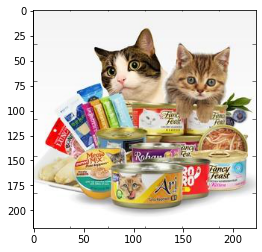

In [61]:
image_path_one = "D:\Haeri_Data\Programming\JupyterNotebook\Jupyter_security\models\image_2cat.png"

logit_one = inference_on_image(image_path_one)

print_image(image_path_one)

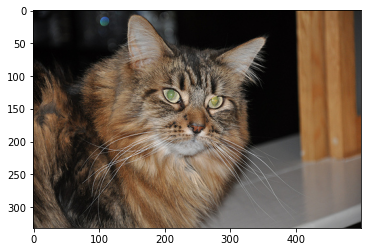

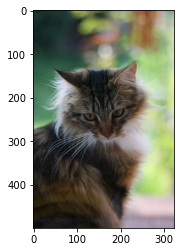

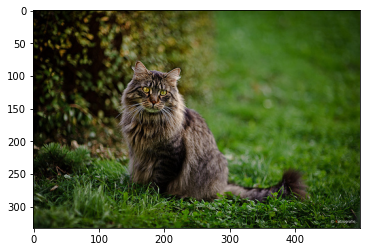

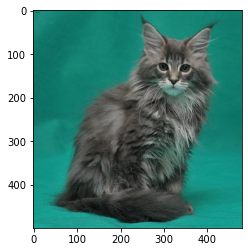

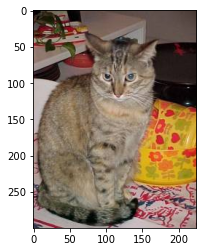

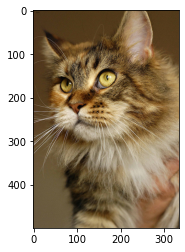

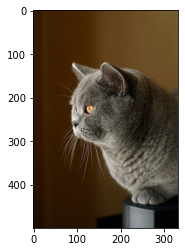

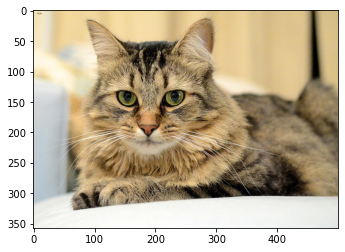

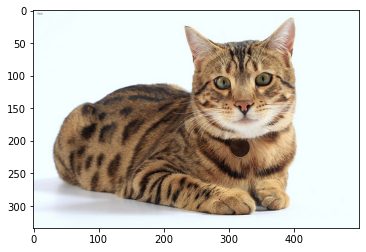

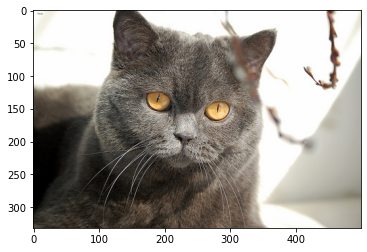

In [63]:
predict_once = knn.kneighbors(logit_one[0], return_distance=False)

show_image_(predict_once[0])